In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw = pd.read_excel("./Normalized_table.xlsx")
wordFeaturesRaw = pd.read_excel("./xk/excel/feature.xlsx")
wordFeaturesColunm = ['Replication number','Frequency','characters','root']
wordFeatures = pd.concat([raw.loc[:, 'Word'], wordFeaturesRaw.loc[:, wordFeaturesColunm]], axis=1)
statsData = raw.iloc[:,6:6+17]
# wordFeatures
means = statsData['Means']
stds = statsData['Stddev']
predictions = statsData.iloc[:,10:17]

0      1.055036
1      1.204824
2      1.212601
3      1.176903
4      1.085923
         ...   
350    1.080509
351    0.997635
352    1.019804
353    1.024209
354    1.027640
Name: Stddev, Length: 355, dtype: float64

In [69]:
checkData = pd.concat([wordFeatures[wordFeaturesColunm], means, stds], axis=1)
checkData = (checkData-checkData.mean())/checkData.std()
checkData

,Replication number,Frequency,characters,root,Means,Stddev
0,-0.617299,-0.194216,-0.313330,-1.012756,-0.162934,-0.518944
1,-0.617299,-0.208575,-0.313330,0.984624,0.061162,0.701283
2,1.531144,-0.204473,-0.313330,-1.012756,1.106940,0.764636
3,-0.617299,-0.139515,-0.313330,0.984624,0.584051,0.473829
4,-0.617299,0.282368,-0.313330,-1.012756,-1.059315,-0.267323
...,...,...,...,...,...,...
350,1.531144,-0.213361,-0.313330,0.984624,0.633850,-0.311427
351,-0.617299,-0.197635,-0.313330,0.984624,-0.113135,-0.986551
352,-0.617299,-0.206524,-0.313330,-1.012756,0.509352,-0.805953
353,-0.617299,-0.212678,-0.313330,0.984624,-0.138034,-0.770068


In [76]:
checkData.corr().loc[['Replication number','Frequency','characters','root'], ['Means','Stddev']]
checkData.corr('spearman')

,Replication number,Frequency,characters,root,Means,Stddev
Replication number,1.000000,-0.125779,0.037458,-0.046136,0.391946,-0.111305
Frequency,-0.125779,1.000000,0.272531,0.007094,-0.203228,0.124238
characters,0.037458,0.272531,1.000000,0.075062,-0.017564,-0.044125
root,-0.046136,0.007094,0.075062,1.000000,0.043657,0.073701
Means,0.391946,-0.203228,-0.017564,0.043657,1.000000,0.225463
Stddev,-0.111305,0.124238,-0.044125,0.073701,0.225463,1.000000


导入包

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.stats as stats
from scipy.integrate import quad
from scipy.stats import ttest_ind

Replication number与means以及stddev进行方差分析

In [9]:
data = pd.read_excel('../Normalized_table.xlsx')
data1 = pd.read_excel('../xk/excel/feature.xlsx')

In [21]:
male_height = data[data1['Replication number'] == 1]['Means']
female_height = data[data1['Replication number'] == 2]['Means']
male_mean, female_mean = male_height.mean(), female_height.mean()
male_std, female_std = male_height.std(), female_height.std()
t, p = ttest_ind(male_height, female_height)
print('Replication number-Means')
print('Once: mean=%.2f, std=%.2f' % (male_mean, male_std))
print('Twice: mean=%.2f, std=%.2f' % (female_mean, female_std))
print('t=%.20f, p=%.20f' % (t, p))


Replication number-Means
Once: mean=4.10, std=0.37
Twice: mean=4.42, std=0.38
t=-7.14626141440085405065, p=0.00000000000519520662


In [20]:
male_height = data[data1['Replication number'] == 1]['Stddev']
female_height = data[data1['Replication number'] == 2]['Stddev']
male_mean, female_mean = male_height.mean(), female_height.mean()
male_std, female_std = male_height.std(), female_height.std()
t, p = ttest_ind(male_height, female_height)
print('Replication number-Stddev')
print('Once: mean=%.2f, std=%.2f' % (male_mean, male_std))
print('Twice: mean=%.2f, std=%.2f' % (female_mean, female_std))
print('t=%.20f, p=%.20f' % (t, p))


Replication number-Stddev
Once: mean=1.13, std=0.12
Twice: mean=1.10, std=0.12
t=1.92144315163186352180, p=0.05548538304628135298


root与means以及stddev进行方差分析

In [22]:
male_height = data[data1['root'] == 0]['Means']
female_height = data[data1['root'] == 1]['Means']
male_mean, female_mean = male_height.mean(), female_height.mean()
male_std, female_std = male_height.std(), female_height.std()
t, p = ttest_ind(male_height, female_height)
print('Replication number-Stddev')
print('Once: mean=%.2f, std=%.2f' % (male_mean, male_std))
print('Twice: mean=%.2f, std=%.2f' % (female_mean, female_std))
print('t=%.20f, p=%.20f' % (t, p))

Replication number-Stddev
Once: mean=4.18, std=0.42
Twice: mean=4.21, std=0.38
t=-0.66331964442032520513, p=0.50755879075395848865


In [24]:
male_height = data[data1['root'] == 0]['Stddev']
female_height = data[data1['root'] == 1]['Stddev']
male_mean, female_mean = male_height.mean(), female_height.mean()
male_std, female_std = male_height.std(), female_height.std()
t, p = ttest_ind(male_height, female_height)
print('Replication number-Stddev')
print('Once: mean=%.2f, std=%.2f' % (male_mean, male_std))
print('Twice: mean=%.2f, std=%.2f' % (female_mean, female_std))
print('t=%.20f, p=%.20f' % (t, p))

Replication number-Stddev
Once: mean=1.11, std=0.13
Twice: mean=1.12, std=0.11
t=-0.76975235612352166381, p=0.44196159135218626712


对Frequency、Means以及Stddev作QQ图

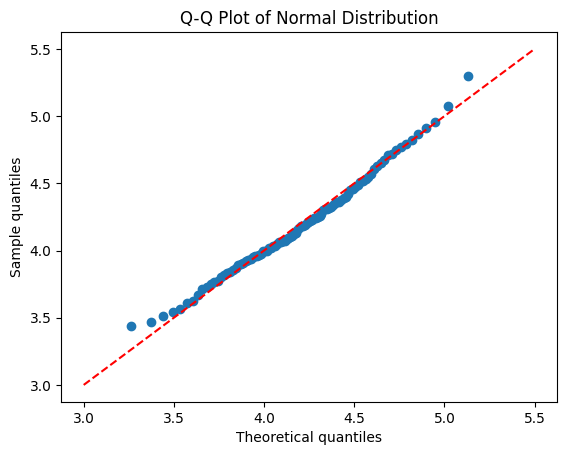

In [26]:
data = pd.read_excel('../Normalized_table.xlsx')
means = data['Means']
mean = np.mean(means) # 计算均值
std_dev = np.std(means) # 计算标准差

quantiles_data = np.percentile(means, np.arange(0, 100, 1)) #实际的
quantiles_norm = stats.norm.ppf(np.arange(0, 100, 1)/100, loc=mean, scale=std_dev) ##理论的

plt.scatter(quantiles_norm, quantiles_data)
plt.plot([3, 5.5], [3, 5.5], 'r--')  # 绘制对角线
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Q-Q Plot of Normal Distribution')
plt.show()

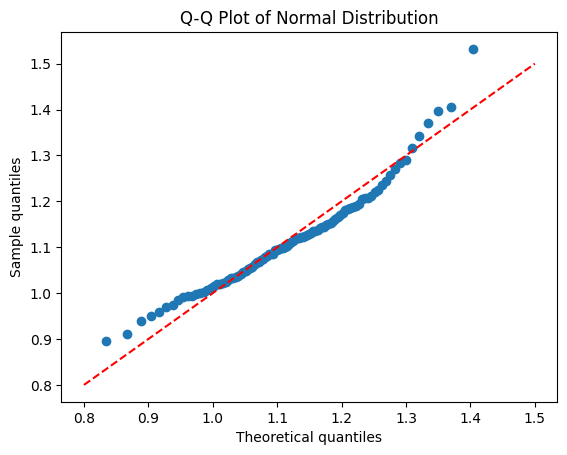

In [30]:
data = pd.read_excel('../Normalized_table.xlsx')
means = data['Stddev']
mean = np.mean(means) # 计算均值
std_dev = np.std(means) # 计算标准差

quantiles_data = np.percentile(means, np.arange(0, 100, 1)) #实际的
quantiles_norm = stats.norm.ppf(np.arange(0, 100, 1)/100, loc=mean, scale=std_dev) ##理论的

plt.scatter(quantiles_norm, quantiles_data)
plt.plot([0.8, 1.5], [0.8, 1.5], 'r--')  # 绘制对角线
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Q-Q Plot of Normal Distribution')
plt.show()

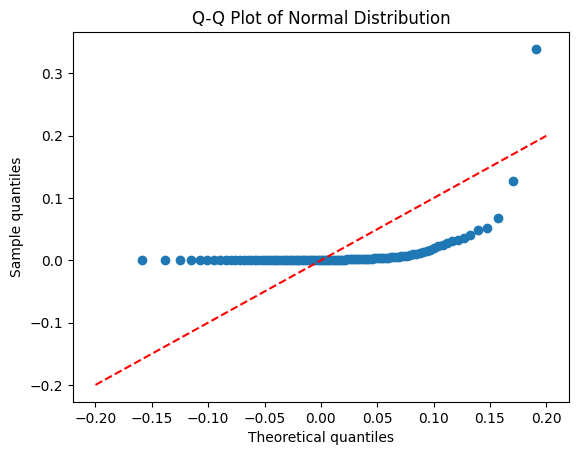

In [34]:
data1 = pd.read_excel('../xk/excel/feature.xlsx')
means = data1['Frequency_scaled']
mean = np.mean(means) # 计算均值
std_dev = np.std(means) # 计算标准差

quantiles_data = np.percentile(means, np.arange(0, 100, 1)) #实际的
quantiles_norm = stats.norm.ppf(np.arange(0, 100, 1)/100, loc=mean, scale=std_dev) ##理论的

plt.scatter(quantiles_norm, quantiles_data)
plt.plot([-0.2, 0.2], [-0.2, 0.2], 'r--')  # 绘制对角线
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Q-Q Plot of Normal Distribution')
plt.show()